=== Handle imports and paths ===

In [2]:
import sys
sys.path.append('/mnt/md0/tempFolder/samAnderson/gnn_model/unet-gnn/functions/') 
from paths_and_imports import *
from control_flow_functions import *
%load_ext autoreload
%autoreload 2

=== Load the trained model ===

In [ ]:
trained_model = get_gnn(fs=feature_scale, dropout_levels=dropout_levels, 
                           pooling_path=pooling_path, ico_levels=ico_levels)    
trained_model.load_state_dict(torch.load(f'{output_dir}trained_weights.pth'))

=== Validate the model on the Female and Male testing sets ===

Males

Saved Figure: /mnt/md0/tempFolder/samAnderson/gnn_model/unet-gnn/last_model_outputs/test_m_raw_age_gaps.png
Figure stats: mean = -3.237225497221862 ; median = -2.8003309908014984 ; std = 6.131829152618904 ; var = 37.59932875690707
Saved Figure: /mnt/md0/tempFolder/samAnderson/gnn_model/unet-gnn/last_model_outputs/test_m_corrected_age_gaps.png
Figure stats: mean = -0.024610754136128454 ; median = -0.18059453516187318 ; std = 1.1099678050082504 ; var = 1.2320285281548335

Top 10 significant age gaps:

               region hemi       age_gap variance  skew  region_avg  adj_pval
        Pole_temporal   lh -2.20 (-5.42)    46.02  0.00       -1.92  0.000004
G_temp_sup-Plan_polar   lh -1.85 (-5.06)    44.62  0.00       -1.72  0.000123
        Pole_temporal   rh -1.64 (-4.85)    45.23 -0.01       -1.92  0.000965
       G_temporal_inf   rh -1.64 (-4.85)    45.44  0.01       -1.54  0.000965
G_temp_sup-Plan_polar   rh -1.58 (-4.80)    45.63  0.00       -1.72  0.001460
            S_central   lh 

<Figure size 640x480 with 0 Axes>

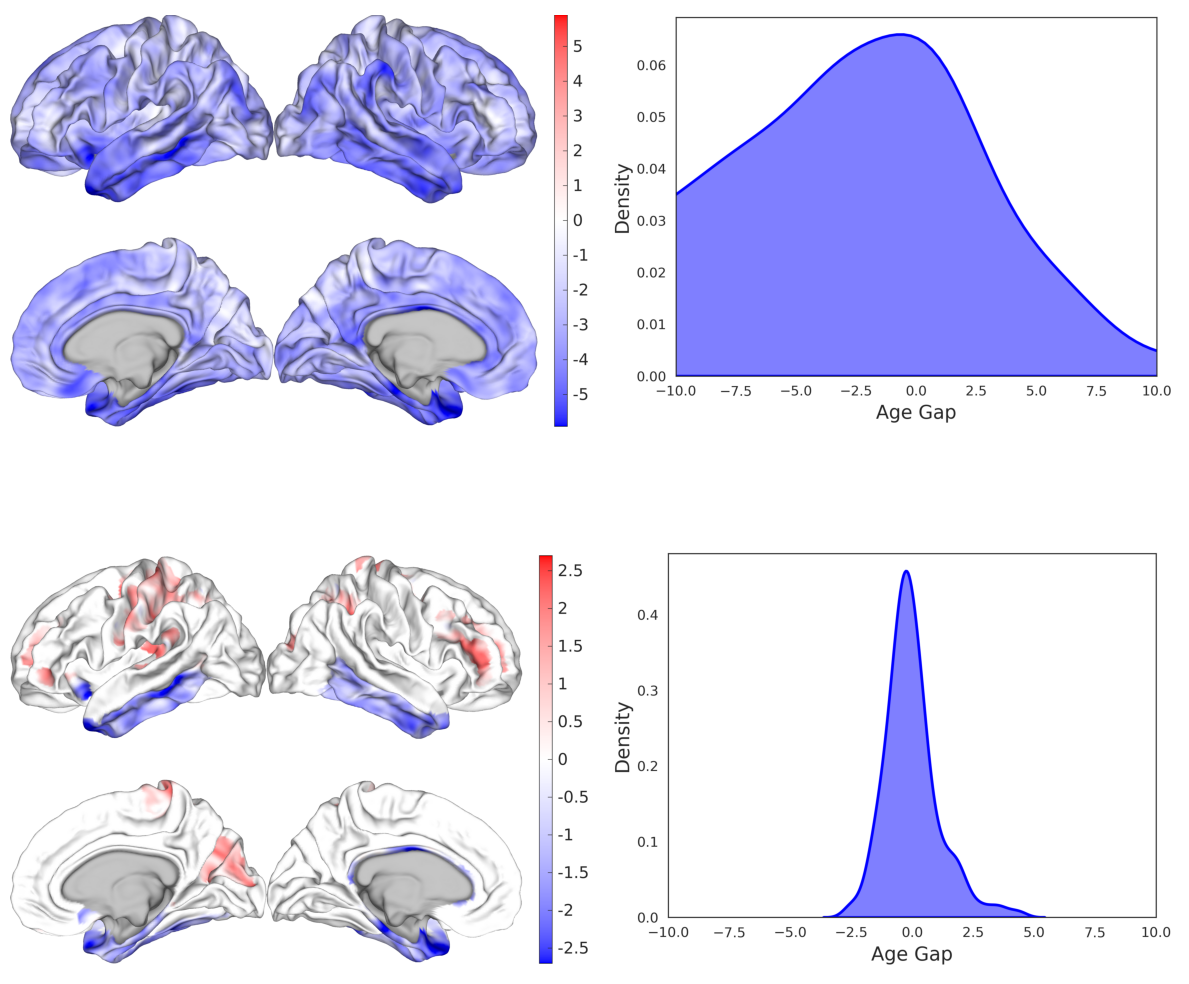

In [7]:
suffix='test_m'
#test_model(X_test_m, y_test_m, model=trained_model, suffix=suffix)
postprocess_model(suffix, factors=np.load(f'{output_dir}test_CN_factors.npy'), global_limits=10)

Females

Saved Figure: /mnt/md0/tempFolder/samAnderson/gnn_model/unet-gnn/last_model_outputs/test_f_raw_age_gaps.png
Figure stats: mean = -1.1988265375047988 ; median = -0.9736807698670447 ; std = 6.449084883836652 ; var = 41.5906958389304
Saved Figure: /mnt/md0/tempFolder/samAnderson/gnn_model/unet-gnn/last_model_outputs/test_f_corrected_age_gaps.png
Figure stats: mean = 0.025468733983877494 ; median = -0.11745817767144118 ; std = 1.1178895711800043 ; var = 1.2496770933530141

Top 10 significant age gaps:

               region hemi       age_gap variance  skew  region_avg  adj_pval
        Pole_temporal   lh -2.11 (-3.34)    54.29 -0.09       -1.85  0.000094
G_temp_sup-Plan_polar   lh -1.60 (-2.83)    52.85 -0.09       -1.53  0.006504
        Pole_temporal   rh -1.58 (-2.81)    53.58 -0.07       -1.85  0.006504
            S_central   lh   1.53 (0.31)    50.39 -0.16        1.06  0.006504
       G_temporal_inf   rh -1.51 (-2.73)    54.15 -0.08       -1.35  0.008175
 S_orbital_med-olfact   rh  

<Figure size 640x480 with 0 Axes>

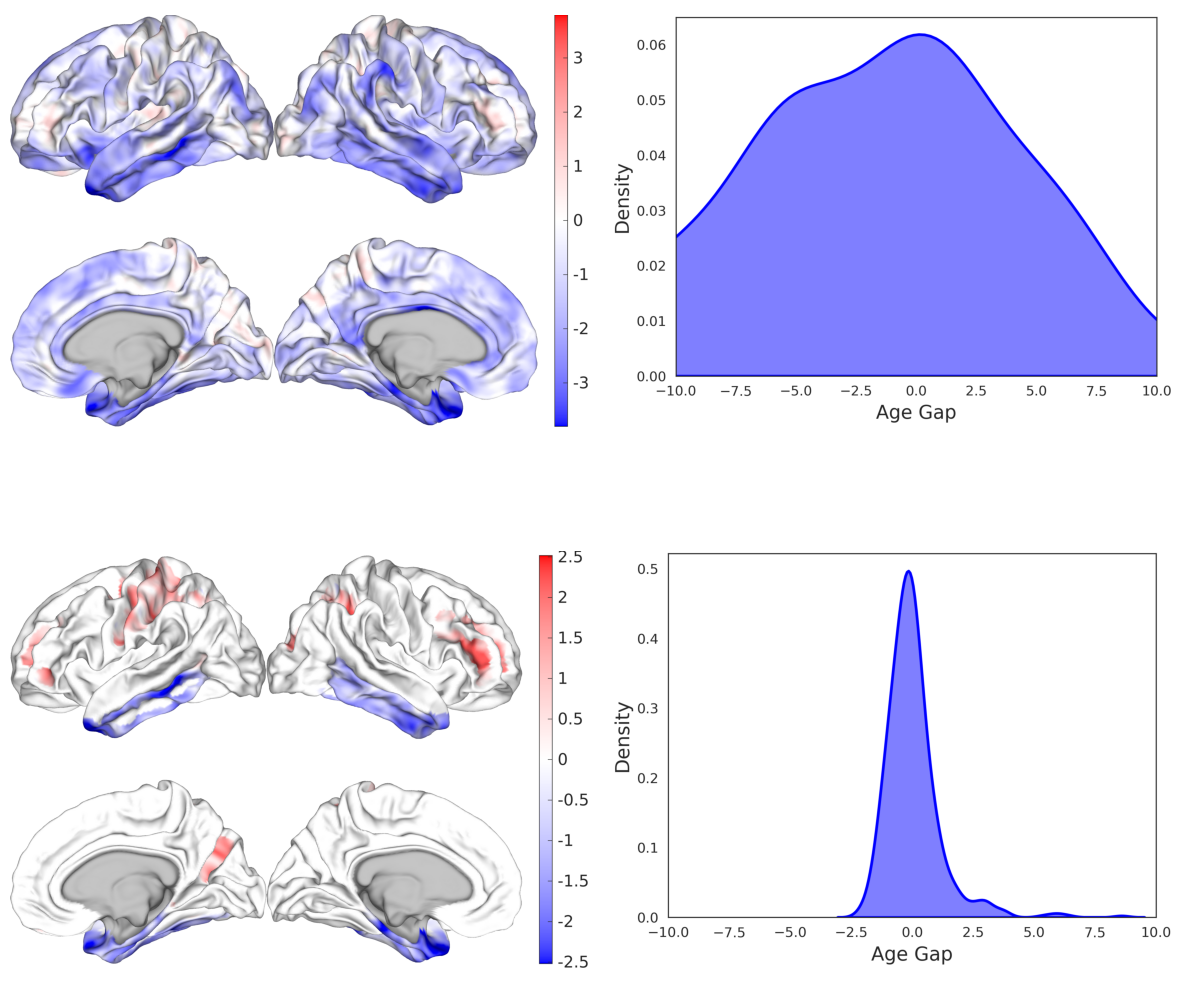

In [8]:
suffix='test_f'
#test_model(X_test_f, y_test_f, model=trained_model, suffix=suffix)
postprocess_model(suffix, factors=np.load(f'{output_dir}test_CN_factors.npy'), global_limits=10)

View differences in predictions and error across females and males


Top 10 significant age gaps:

                  region hemi  age_gap   t_stat     raw_pval  region_avg     adj_pval  significant
    Lat_Fis-ant-Vertical   lh 0.350123 5.877521 1.864881e-08    0.286489 5.198611e-07            1
    S_orbital_med-olfact   rh 0.319787 3.078391 2.205078e-03    0.215317 1.225044e-02            1
          G_temporal_inf   lh 0.248208 8.049155 1.872418e-15    0.190908 2.808628e-13            1
   G_temp_sup-Plan_polar   lh 0.245178 2.833038 4.828687e-03    0.191857 2.194858e-02            1
                G_rectus   rh 0.232749 3.078664 2.200958e-03    0.201539 1.225044e-02            1
    Lat_Fis-ant-Vertical   rh 0.222854 2.999532 3.201392e-03    0.286489 1.549061e-02            1
   S_circular_insula_sup   lh 0.187754 6.806815 1.435602e-11    0.146333 1.076702e-09            1
         S_occipital_ant   lh 0.184732 2.663253 8.032223e-03    0.135816 3.170990e-02            1
S_oc_sup_and_transversal   lh 0.182572 3.580867 3.680052e-04    0.160002 3.450

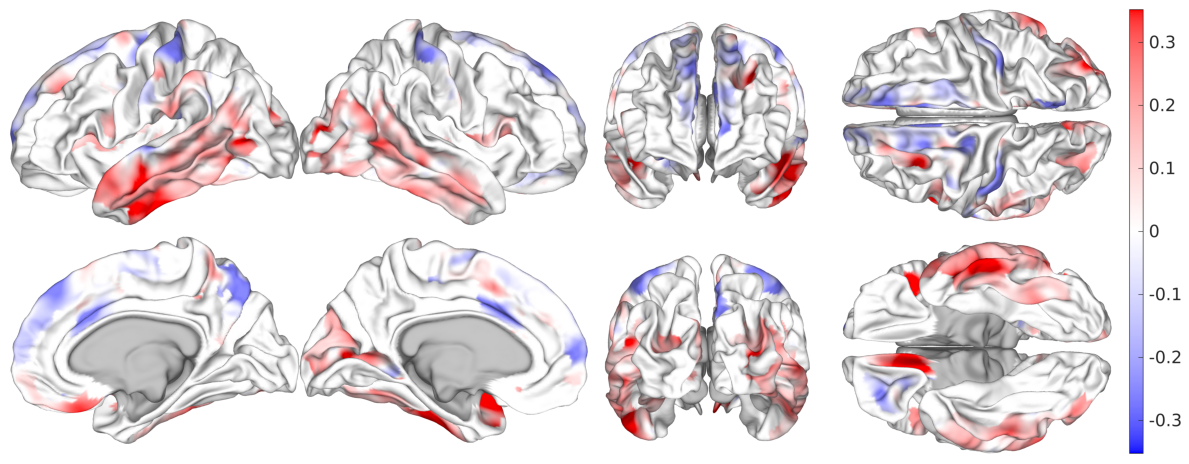

In [5]:
compare_cohorts(suffix='f-m', cohort_pred='test_f', cohort_ref='test_m') # pred - ref

Get the region stats, including average age gap, for CNs, ADs, and AD-CNs

In [6]:
print('\n\nFemales\n')
show_ranked_differences(suffix='test_f', output_dir=output_dir)
print('\n\nMales\n')
show_ranked_differences(suffix='test_m', output_dir=output_dir)
print('\n\nFemales-Males\n')
show_ranked_differences(suffix='f-m', output_dir=output_dir)



Females


All regions ranked by average age gap:
Region                               Avg Gap   LH Gap   RH Gap
-------------------------------------------------------------------------------------
S_front_middle                          1.32     1.24     1.40 
S_orbital_lateral                       1.27     1.41     1.14 
S_intrapariet_and_P_trans               1.24     1.08     1.40 
S_postcentral                           1.06     1.33     0.78 
S_central                               1.05     1.53     0.58 
S_front_inf                             1.03     0.75     1.31 
S_precentral-sup-part                   1.02     1.09     0.94 
G_parietal_sup                          0.83     0.93     0.73 
G_and_S_paracentral                     0.82     0.62     1.03 
S_orbital_med-olfact                    0.79     0.14     1.45 
S_front_sup                             0.79     0.77     0.81 
Lat_Fis-ant-Horizont                    0.79     0.54     1.03 
G_postcentral                   